# Conversational Health Analytics – Data Preparation & Exploration

This notebook outlines the process of loading, cleaning, merging, and analyzing the DAIC-WOZ / AVEC 2017 depression dataset for conversational health analytics research.

## 1. Load Labels (Train / Dev / Test Splits)

In [133]:
# 1. Load labels (contains Participant_ID, PHQ8_Binary, etc.)
import pandas as pd

# Read the CSV file

train_file_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\Dataset\train_split_Depression_AVEC2017.csv"
DF_TRAIN = pd.read_csv(train_file_path)

dev_file_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\Dataset\dev_split_Depression_AVEC2017.csv"
DF_DEV = pd.read_csv(dev_file_path)

test_file_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\Dataset\full_test_split.csv"
DF_TEST = pd.read_csv(test_file_path)

# --- Select only the required columns ---
selected_cols = ['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender']

DF_TRAIN = DF_TRAIN[selected_cols].copy()
DF_DEV   = DF_DEV[selected_cols].copy()
DF_TEST  = DF_TEST[selected_cols].copy()


# --- Add a column to track which split each row came from ---
DF_TRAIN["split"] = "train"
DF_DEV["split"]   = "dev"
DF_TEST["split"]  = "test"

# --- Combine all three into one dataset ---
DF_ALL = pd.concat([DF_TRAIN, DF_DEV, DF_TEST], ignore_index=True)


#### Purpose:
This step imports all the metadata and PHQ-8 labels for each participant. Each file corresponds to a dataset split:

- Train - used to train models.
- Dev - used for validation and hyperparameter tuning.
- Test - used for final model evaluation.

In [134]:
# --- Optional: Check for duplicates or inconsistencies ---
duplicates = DF_ALL["Participant_ID"].duplicated().sum()
print(f"Duplicate Participant_IDs found: {duplicates}")

Duplicate Participant_IDs found: 0


In [136]:
# --- Display summary ---
print("Combined Dataset Created Successfully!")
print("Shape:", DF_ALL.shape)
print("Columns:", DF_ALL.columns.tolist())
print(DF_ALL.head())
print(DF_ALL.tail())


Combined Dataset Created Successfully!
Shape: (189, 5)
Columns: ['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender', 'split']
   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  split
0             303            0           0       0  train
1             304            0           6       0  train
2             305            0           7       1  train
3             310            0           4       1  train
4             312            0           2       1  train
     Participant_ID  PHQ8_Binary  PHQ8_Score  Gender split
184             467            0           0       1  test
185             469            0           3       0  test
186             470            0           3       0  test
187             480            0           1       1  test
188             481            0           7       1  test


In [139]:
# --- Sort by Participant_ID ---
DF_ALL = DF_ALL.sort_values(by="Participant_ID").reset_index(drop=True)


In [140]:

# --- Display summary ---
print("Combined Dataset Created Successfully!")
print("Shape:", DF_ALL.shape)
print("Columns:", DF_ALL.columns.tolist())
print(DF_ALL.head())
print(DF_ALL.tail())

Combined Dataset Created Successfully!
Shape: (189, 5)
Columns: ['Participant_ID', 'PHQ8_Binary', 'PHQ8_Score', 'Gender', 'split']
   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  split
0             300            0           2       1   test
1             301            0           3       1   test
2             302            0           4       1    dev
3             303            0           0       0  train
4             304            0           6       0  train
     Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  split
184             488            0           0       0  train
185             489            0           3       1    dev
186             490            0           2       1    dev
187             491            0           8       0  train
188             492            0           0       0    dev


#### Quick Inspection:

Displays:

- Dataset shape.
- column names.
- sample rows.
- summary statistics to confirm structure and quality.

In [118]:
# Display basic information about the dataset
print("Dataset shape:", DF_TRAIN.shape)

print("\nFirst 5 rows:")
print(DF_TRAIN.head())

print("\nColumn names:")
print(DF_TRAIN.columns.tolist())

print("\nBasic statistics:")
print(DF_TRAIN.describe())

Dataset shape: (107, 12)

First 5 rows:
   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  \
0             303            0           0       0                0   
1             304            0           6       0                0   
2             305            0           7       1                0   
3             310            0           4       1                1   
4             312            0           2       1                0   

   PHQ8_Depressed  PHQ8_Sleep  PHQ8_Tired  PHQ8_Appetite  PHQ8_Failure  \
0               0         0.0           0              0             0   
1               1         1.0           2              2             0   
2               1         1.0           2              2             1   
3               1         0.0           0              0             1   
4               0         1.0           1              0             0   

   PHQ8_Concentrating  PHQ8_Moving  
0                   0            0  
1             

In [119]:
# Display basic information about the dataset
print("Dataset shape:", DF_DEV.shape)

print("\nFirst 5 rows:")
print(DF_DEV.head())

print("\nColumn names:")
print(DF_DEV.columns.tolist())

print("\nBasic statistics:")
print(DF_DEV.describe())

Dataset shape: (35, 12)

First 5 rows:
   Participant_ID  PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  \
0             302            0           4       1                1   
1             307            0           4       0                0   
2             331            0           8       1                1   
3             335            1          12       0                1   
4             346            1          23       0                2   

   PHQ8_Depressed  PHQ8_Sleep  PHQ8_Tired  PHQ8_Appetite  PHQ8_Failure  \
0               1           0           1              0             1   
1               1           0           1              0             2   
2               1           1           1              1             1   
3               1           3           2              3             1   
4               3           3           3              3             3   

   PHQ8_Concentrating  PHQ8_Moving  
0                   0            0  
1              

In [120]:
# Display basic information about the dataset
print("Dataset shape:", DF_TEST.shape)

print("\nFirst 5 rows:")
print(DF_TEST.head())

print("\nColumn names:")
print(DF_TEST.columns.tolist())

print("\nBasic statistics:")
print(DF_TEST.describe())

Dataset shape: (47, 4)

First 5 rows:
   Participant_ID  PHQ_Binary  PHQ_Score  Gender
0             300           0          2       1
1             301           0          3       1
2             306           0          0       0
3             308           1         22       0
4             309           1         15       1

Column names:
['Participant_ID', 'PHQ_Binary', 'PHQ_Score', 'Gender']

Basic statistics:
       Participant_ID  PHQ_Binary  PHQ_Score     Gender
count       47.000000   47.000000  47.000000  47.000000
mean       394.659574    0.297872   6.978723   0.489362
std         57.698721    0.462267   6.472313   0.505291
min        300.000000    0.000000   0.000000   0.000000
25%        343.000000    0.000000   1.500000   0.000000
50%        405.000000    0.000000   5.000000   0.000000
75%        446.000000    1.000000  11.000000   1.000000
max        481.000000    1.000000  22.000000   1.000000


## 2. Load and Combine Transcript Files.

In [122]:
import pandas as pd
import os
import glob

base_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\Dataset\extracted_folders"
transcript_files = glob.glob(os.path.join(base_path, "*", "*_TRANSCRIPT.csv"))

# Load properly with tab separation
all_transcripts = pd.concat(
    [
        pd.read_csv(f, sep="\t").assign(
            participant=int(os.path.basename(f).split("_")[0])  # e.g. "300"
        )
        for f in transcript_files
    ],
    ignore_index=True
)

#### Purpose:
This step loads all transcript files for each participant (each folder contains a _TRANSCRIPT.csv)

- Uses a glob to locate all files recursively.
- Reads with tab separation (sep="\t").
- Extracts the participant ID from the filename (e.g., 300_TRANSCRIPT.csv -> ID 300).
- Concatenates all transcripts into one unified DataFrame all_transcripts.

#### Outputs:
Displays file count, shape, and column structure to verify successful loading.

In [123]:
print(len(transcript_files))
print("Shape:", all_transcripts.shape)
print("Columns:", all_transcripts.columns.tolist())
print(all_transcripts.columns.to_list())

189
Shape: (47400, 5)
Columns: ['start_time', 'stop_time', 'speaker', 'value', 'participant']
['start_time', 'stop_time', 'speaker', 'value', 'participant']


In [124]:
print(all_transcripts.tail())

       start_time  stop_time      speaker  \
47395     886.374    888.814        Ellie   
47396     889.513    890.953        Ellie   
47397     891.758    892.368        Ellie   
47398     891.800    892.940  Participant   
47399     893.410    894.680  Participant   

                                                   value  participant  
47395  asked_everything (okay i think i have asked ev...          492  
47396  appreciate_open (thanks for sharing your thoug...          492  
47397                                      bye (goodbye)          492  
47398                                  bye and thank you          492  
47399                               see ya'll <laughter>          492  


In [125]:
print(all_transcripts.head())

   start_time  stop_time speaker  \
0      36.588     39.668   Ellie   
1      39.888     43.378   Ellie   
2      43.728     48.498   Ellie   
3      49.188     52.388   Ellie   
4      52.658     58.958   Ellie   

                                               value  participant  
0            hi i'm ellie thanks for coming in today          300  
1  i was created to talk to people in a safe and ...          300  
2  think of me as a friend i don't judge i can't ...          300  
3  i'm here to learn about people and would love ...          300  
4  i'll ask a few questions to get us started and...          300  


## 3. FILTER HUMAN RESPONSES AND GROUP TRANSCRIPTS.

In [126]:
# Step 1: Filter out Ellie
participant_only = all_transcripts[all_transcripts["speaker"] != "Ellie"]

# Step 2: Group by participant, join all utterances
transcripts_grouped = (
    participant_only.groupby("participant")["value"]
    .apply(lambda x: " ".join(x.astype(str)))
    .reset_index()
    .rename(columns={"participant": "Participant_ID", "value": "transcript_text"})
)

print(transcripts_grouped.shape)
print(transcripts_grouped.head())


(189, 2)
   Participant_ID                                    transcript_text
0             300  good atlanta georgia um my parents are from he...
1             301  thank you mmm k i'm doing good thank you i'm f...
2             302  i'm fine how about yourself  i'm from los ange...
3             303  okay how 'bout yourself here in california yea...
4             304  i'm doing good um from los angeles california ...


In [127]:
print(transcripts_grouped.tail())

     Participant_ID                                    transcript_text
184             488  <synch> yes fine oh san fernando valley uh wel...
185             489  <synch> yes i'm doing well thank you san luis ...
186             490  <synch> yeah i'm doing already how are you doi...
187             491  <synch> yes huh overwhelmed i have a funeral t...
188             492  <synch> yes doing pretty good thank you maryla...


#### Purpose:
- Removes the Interviewer ("Ellie") and retains only the participant's speech.
- All utterances per participant are joined into a single transcript (one row per participant).

#### Output:
A compact dataset:

participant_ID | transcript_text

## 4. Merge Transcripts with Labels.

In [141]:
# Step 3: Merge with labels
TRAINING_DATASET = pd.merge(transcripts_grouped, DF_TRAIN, on="Participant_ID", how="inner")

VALIDATION_DATASET = pd.merge(transcripts_grouped, DF_DEV, on="Participant_ID", how="inner")

DAIC_WOZ_DATASET = pd.merge(transcripts_grouped, DF_ALL, on="Participant_ID", how="inner")

##TESTING_DATASET = pd.merge(transcripts_grouped, DF_TEST, on="Participant_ID", how="inner")


#### Purpose:
- Combines the text transcripts with the corresponding PHQ-8 labels (and metadata like gender, age, etc.)
- Ensures each participant transcript is linked with their depression labe.

#### Results:
Merged Dataframe TRAINING_DATASET AND VALIDATION_DATASET. 

## 5. Save Merged Datasets.

In [142]:
save_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\TRAINING_DATASET.csv"
TRAINING_DATASET.to_csv(save_path, index=False)
print("Saved merged dataset to:", save_path)

save_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\VALIDATION_DATASET.csv"
VALIDATION_DATASET.to_csv(save_path, index=False)
print("Saved merged dataset to:", save_path)

save_path = r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\DAIC_WOZ_DATASET.csv"
DAIC_WOZ_DATASET.to_csv(save_path, index=False)
print("Saved merged dataset to:", save_path)


Saved merged dataset to: C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\TRAINING_DATASET.csv
Saved merged dataset to: C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\VALIDATION_DATASET.csv
Saved merged dataset to: C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\DAIC_WOZ_DATASET.csv


In [144]:
print(DAIC_WOZ_DATASET.shape)

(189, 6)


In [145]:
print(DAIC_WOZ_DATASET[["Participant_ID", "transcript_text", "PHQ8_Binary"]].head(5))

   Participant_ID                                    transcript_text  \
0             300  good atlanta georgia um my parents are from he...   
1             301  thank you mmm k i'm doing good thank you i'm f...   
2             302  i'm fine how about yourself  i'm from los ange...   
3             303  okay how 'bout yourself here in california yea...   
4             304  i'm doing good um from los angeles california ...   

   PHQ8_Binary  
0            0  
1            0  
2            0  
3            0  
4            0  


In [143]:
print(TRAINING_DATASET.shape)
print(VALIDATION_DATASET.shape)
##print(TESTING_DATASET.shape)

print(TRAINING_DATASET[["Participant_ID", "transcript_text", "PHQ8_Binary"]].head(5))


(107, 6)
(35, 6)
   Participant_ID                                    transcript_text  \
0             303  okay how 'bout yourself here in california yea...   
1             304  i'm doing good um from los angeles california ...   
2             305  i'm doing alright uh originally i'm from calif...   
3             310  yes it's okay <laughter> fine <laughter> i liv...   
4             312  yes fine how about you here yes the weather we...   

   PHQ8_Binary  
0            0  
1            0  
2            0  
3            0  
4            0  


In [103]:
print(VALIDATION_DATASET[["Participant_ID", "transcript_text", "PHQ8_Binary"]].head(5))

   Participant_ID                                    transcript_text  \
0             302  i'm fine how about yourself  i'm from los ange...   
1             307  <laughter> um moscow um my family moved to the...   
2             331  yes  okay  connecticut um  to be an actor <lau...   
3             335  yes i'm okay  uh i'm from here originally los ...   
4             346  yes  i'm okay  here in los angeles  there's a ...   

   PHQ8_Binary  
0            0  
1            0  
2            0  
3            1  
4            1  


In [147]:
print(TRAINING_DATASET.columns)

Index(['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score',
       'Gender', 'split'],
      dtype='object')


In [146]:
print(DAIC_WOZ_DATASET.columns)

Index(['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score',
       'Gender', 'split'],
      dtype='object')


In [106]:
print(VALIDATION_DATASET.columns)

Index(['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score',
       'Gender', 'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep',
       'PHQ8_Tired', 'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating',
       'PHQ8_Moving'],
      dtype='object')


In [107]:
print(TRAINING_DATASET)

     Participant_ID                                    transcript_text  \
0               303  okay how 'bout yourself here in california yea...   
1               304  i'm doing good um from los angeles california ...   
2               305  i'm doing alright uh originally i'm from calif...   
3               310  yes it's okay <laughter> fine <laughter> i liv...   
4               312  yes fine how about you here yes the weather we...   
..              ...                                                ...   
102             485  <synch> yes i'm not bad i'm a little tired but...   
103             486  <synch> yes i'm feel great i am from saint lou...   
104             487  <synch> yes i'm fine thank you detroit michiga...   
105             488  <synch> yes fine oh san fernando valley uh wel...   
106             491  <synch> yes huh overwhelmed i have a funeral t...   

     PHQ8_Binary  PHQ8_Score  Gender  PHQ8_NoInterest  PHQ8_Depressed  \
0              0           0       0  

In [108]:
print(VALIDATION_DATASET)

    Participant_ID                                    transcript_text  \
0              302  i'm fine how about yourself  i'm from los ange...   
1              307  <laughter> um moscow um my family moved to the...   
2              331  yes  okay  connecticut um  to be an actor <lau...   
3              335  yes i'm okay  uh i'm from here originally los ...   
4              346  yes  i'm okay  here in los angeles  there's a ...   
5              367  <sync> yes i'm okay um i'm a little pensive i ...   
6              377  <synch> yeah go ahead um i'm okay i grew up in...   
7              381  <synch> yes okay from santa monica uh the peop...   
8              382  <synch> sure i'm doing fine i'm from columbia ...   
9              388  <sync> yes doing alright from passaic new jers...   
10             389  <sync> sure okay a small town outside of cinnc...   
11             390  <sync> yes i'm doing pretty well um i have som...   
12             395  <synch> yes i'm doing fine cali

In [148]:
print(DAIC_WOZ_DATASET)

     Participant_ID                                    transcript_text  \
0               300  good atlanta georgia um my parents are from he...   
1               301  thank you mmm k i'm doing good thank you i'm f...   
2               302  i'm fine how about yourself  i'm from los ange...   
3               303  okay how 'bout yourself here in california yea...   
4               304  i'm doing good um from los angeles california ...   
..              ...                                                ...   
184             488  <synch> yes fine oh san fernando valley uh wel...   
185             489  <synch> yes i'm doing well thank you san luis ...   
186             490  <synch> yeah i'm doing already how are you doi...   
187             491  <synch> yes huh overwhelmed i have a funeral t...   
188             492  <synch> yes doing pretty good thank you maryla...   

     PHQ8_Binary  PHQ8_Score  Gender  split  
0              0           2       1   test  
1              0   

In [109]:
for t in TRAINING_DATASET["transcript_text"].head(5):
    print(t[:300])   
    print("---") 

okay how 'bout yourself here in california yeah oh well that it's big and broad there's a lot to do a lot of um um job opportunities than other states um pretty much that it's big and there's a lot you can do here traffic um maybe the violence rate bad news even though you know you wanna know what's
---
i'm doing good um from los angeles california um the cool weather the beaches the people the schools  um child development yes to be a teacher for special education it's not hard 'cause i love to work with children yes dishonesty maybe um like if a guy like especially when it comes to relationships 
---
i'm doing alright uh originally i'm from california uh born in glendale i'm not too happy with it uh just unemployed at the moment but uh actively seeking uh uh doing what i'm supposed to be doing uh there are some uh  some prospects there but hopefully i'll learn something today yeah well i have on
---
yes it's okay <laughter> fine <laughter> i live in hollywood uh seattle <laughter> uh

In [110]:
for t in VALIDATION_DATASET["transcript_text"].head(5):
    print(t[:300])   
    print("---") 

i'm fine how about yourself  i'm from los angeles california what part  okay  um all my family's here friends a mixture of people and a lot of things to do early childhood education no not right now but i would love to get back into it love working with kids seeing them smile um guess it goes back t
---
<laughter> um moscow um my family moved to the u_s and then i moved down here eventually for college  uh it took a long time to i've been living here for about a year since i graduated so there's been a lot of ups and downs but finally gotten adjusted to it so it took a while though it goes off and 
---
yes  okay  connecticut um  to be an actor <laughter>  well i moved to san francisco in ninety four and then i moved to atlanta in ninety six and then i moved out here to be an actor and i became a realtor instead  um to be on a t_v show an actor  it's pretty hard to get discovered and uh  you have t
---
yes i'm okay  uh i'm from here originally los angeles  mhm um i like the weather  and

In [149]:
for t in DAIC_WOZ_DATASET["transcript_text"].head(5):
    print(t[:300])   
    print("---") 

good atlanta georgia um my parents are from here um i love it i like the weather i like the opportunities um yes um it took a minute somewhat easy congestion that's it um i took up business and administration uh yeah i am here and there i'm on a break right now but i plan on going back in the uh nex
---
thank you mmm k i'm doing good thank you i'm from los angeles oh great i live in west los angeles the west side it's alright i xxx no i live alone so i love it i'm from here so i grew up here it's natural the weather um well the weather it's always good it's never it's never bad uh um there's always
---
i'm fine how about yourself  i'm from los angeles california what part  okay  um all my family's here friends a mixture of people and a lot of things to do early childhood education no not right now but i would love to get back into it love working with kids seeing them smile um guess it goes back t
---
okay how 'bout yourself here in california yeah oh well that it's big and broad there

In [111]:
print(TRAINING_DATASET.shape)

(107, 13)


In [112]:

print(TRAINING_DATASET.columns)

Index(['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score',
       'Gender', 'PHQ8_NoInterest', 'PHQ8_Depressed', 'PHQ8_Sleep',
       'PHQ8_Tired', 'PHQ8_Appetite', 'PHQ8_Failure', 'PHQ8_Concentrating',
       'PHQ8_Moving'],
      dtype='object')


In [113]:
TRAINING_DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Participant_ID      107 non-null    int64  
 1   transcript_text     107 non-null    object 
 2   PHQ8_Binary         107 non-null    int64  
 3   PHQ8_Score          107 non-null    int64  
 4   Gender              107 non-null    int64  
 5   PHQ8_NoInterest     107 non-null    int64  
 6   PHQ8_Depressed      107 non-null    int64  
 7   PHQ8_Sleep          106 non-null    float64
 8   PHQ8_Tired          107 non-null    int64  
 9   PHQ8_Appetite       107 non-null    int64  
 10  PHQ8_Failure        107 non-null    int64  
 11  PHQ8_Concentrating  107 non-null    int64  
 12  PHQ8_Moving         107 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 11.0+ KB


In [114]:
TRAINING_DATASET.head()

,Participant_ID,transcript_text,PHQ8_Binary,PHQ8_Score,Gender,PHQ8_NoInterest,PHQ8_Depressed,PHQ8_Sleep,PHQ8_Tired,PHQ8_Appetite,PHQ8_Failure,PHQ8_Concentrating,PHQ8_Moving
0,303,okay how 'bout yourself here in california yea...,0,0,0,0,0,0.0,0,0,0,0,0
1,304,i'm doing good um from los angeles california ...,0,6,0,0,1,1.0,2,2,0,0,0
2,305,i'm doing alright uh originally i'm from calif...,0,7,1,0,1,1.0,2,2,1,0,0
3,310,yes it's okay <laughter> fine <laughter> i liv...,0,4,1,1,1,0.0,0,0,1,1,0
4,312,yes fine how about you here yes the weather we...,0,2,1,0,0,1.0,1,0,0,0,0


In [150]:
DAIC_WOZ_DATASET.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Participant_ID   189 non-null    int64 
 1   transcript_text  189 non-null    object
 2   PHQ8_Binary      189 non-null    int64 
 3   PHQ8_Score       189 non-null    int64 
 4   Gender           189 non-null    int64 
 5   split            189 non-null    object
dtypes: int64(4), object(2)
memory usage: 9.0+ KB


## 6. EDA ON COMBINED DATASET.

### Step 1: Basic Overview

Next Step: Generate Dual Word Clouds

Now that your dataset is confirmed, let’s make side-by-side Word Clouds comparing Depressed vs Non-Depressed participants.

In [175]:
print("Shape:", DAIC_WOZ_DATASET.shape)
print("Columns:", DAIC_WOZ_DATASET.columns.tolist())
DAIC_WOZ_DATASET.info()
DAIC_WOZ_DATASET.head()

Shape: (189, 7)
Columns: ['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score', 'Gender', 'split', 'num_words']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Participant_ID   189 non-null    int64 
 1   transcript_text  189 non-null    object
 2   PHQ8_Binary      189 non-null    int64 
 3   PHQ8_Score       189 non-null    int64 
 4   Gender           189 non-null    int64 
 5   split            189 non-null    object
 6   num_words        189 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 10.5+ KB


,Participant_ID,transcript_text,PHQ8_Binary,PHQ8_Score,Gender,split,num_words
0,300,good atlanta georgia um my parents are from he...,0,2,1,test,352
1,301,thank you mmm k i'm doing good thank you i'm f...,0,3,1,test,1475
2,302,i'm fine how about yourself i'm from los ange...,0,4,1,dev,614
3,303,okay how 'bout yourself here in california yea...,0,0,0,train,1965
4,304,i'm doing good um from los angeles california ...,0,6,0,train,987


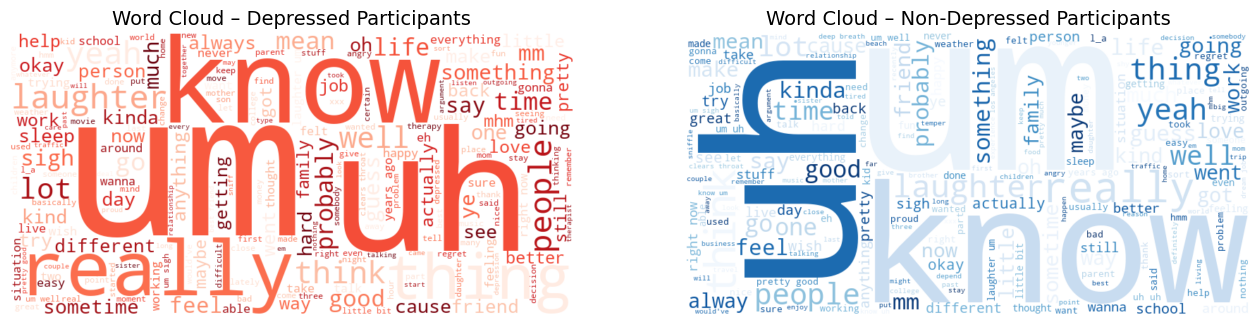

In [176]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Separate text by depression class
text_depressed = " ".join(DAIC_WOZ_DATASET[DAIC_WOZ_DATASET["PHQ8_Binary"] == 1]["transcript_text"])
text_not_depressed = " ".join(DAIC_WOZ_DATASET[DAIC_WOZ_DATASET["PHQ8_Binary"] == 0]["transcript_text"])

# Create WordClouds
wordcloud_dep = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_depressed)
wordcloud_non = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_not_depressed)

# Plot side by side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_dep, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Depressed Participants", fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Non-Depressed Participants", fontsize=14)

plt.show()


#### Quantitative Support: Top Discriminative Words

In [178]:
from collections import Counter
import pandas as pd

# Tokenize and count words for each class
depressed_words = " ".join(DAIC_WOZ_DATASET[DAIC_WOZ_DATASET["PHQ8_Binary"]==1]["transcript_text"]).split()
not_depressed_words = " ".join(DAIC_WOZ_DATASET[DAIC_WOZ_DATASET["PHQ8_Binary"]==0]["transcript_text"]).split()

count_dep = Counter(depressed_words)
count_non = Counter(not_depressed_words)

# Create DataFrame
df_freq = pd.DataFrame({
    'word': list(set(list(count_dep.keys()) + list(count_non.keys()))),
    'depressed_freq': [count_dep[w] for w in set(list(count_dep.keys()) + list(count_non.keys()))],
    'non_depressed_freq': [count_non[w] for w in set(list(count_dep.keys()) + list(count_non.keys()))]
})

# Compute ratio to see discriminative tendency
df_freq["ratio"] = (df_freq["depressed_freq"] + 1) / (df_freq["non_depressed_freq"] + 1)
df_freq_sorted = df_freq.sort_values(by="ratio", ascending=False)

# Top words characteristic of each group
print("Top 15 words more common among depressed participants:\n", df_freq_sorted.head(15))
print("\nTop 15 words more common among non-depressed participants:\n", df_freq_sorted.tail(15))


Top 15 words more common among depressed participants:
              word  depressed_freq  non_depressed_freq  ratio
3782     cheating              10                   0   11.0
6062       please               9                   0   10.0
961       ireland               8                   0    9.0
3770       messed               7                   0    8.0
302         tools               6                   0    7.0
1703      katrina               6                   0    7.0
608        police               5                   0    6.0
1691  considering               5                   0    6.0
693           hop               5                   0    6.0
1308       django               5                   0    6.0
1273   biological               5                   0    6.0
1021         blah               5                   0    6.0
2212        ma'am              10                   1    5.5
8175       marine               4                   0    5.0
4916         lash            

### Step 2: Missing Values Check.

In [153]:
missing_values = DAIC_WOZ_DATASET.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Participant_ID     0
transcript_text    0
PHQ8_Binary        0
PHQ8_Score         0
Gender             0
split              0
dtype: int64


### Step 3: Class Distribution (Depression Vs Non-Depression).

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\2690324898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PHQ8_Binary", data=DF_ALL, palette="coolwarm")


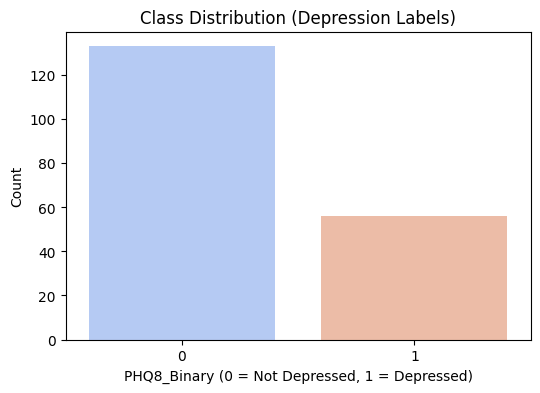

PHQ8_Binary
0    0.703704
1    0.296296
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x="PHQ8_Binary", data=DAIC_WOZ_DATASET, palette="coolwarm")
plt.title("Class Distribution (Depression Labels)")
plt.xlabel("PHQ8_Binary (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Count")
plt.show()

print(DF_ALL["PHQ8_Binary"].value_counts(normalize=True))


### Step 4: PHQ-8 Score Distribution

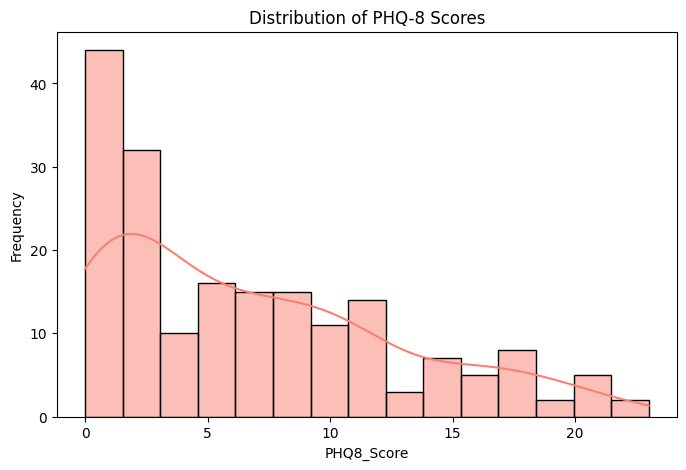

count    189.000000
mean       6.746032
std        5.924081
min        0.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       23.000000
Name: PHQ8_Score, dtype: float64


In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(DAIC_WOZ_DATASET["PHQ8_Score"], bins=15, kde=True, color="salmon")
plt.title("Distribution of PHQ-8 Scores")
plt.xlabel("PHQ8_Score")
plt.ylabel("Frequency")
plt.show()

print(DF_ALL["PHQ8_Score"].describe())

### Step 5: Gender Distribution.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\1759506061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=DAIC_WOZ_DATASET, palette="viridis")


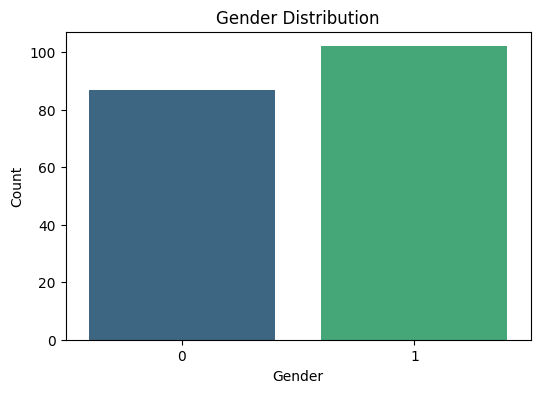

Gender
1    0.539683
0    0.460317
Name: proportion, dtype: float64


In [157]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=DAIC_WOZ_DATASET, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print(DF_ALL["Gender"].value_counts(normalize=True))


### Step 6: Gender Vs Depression Relationship.

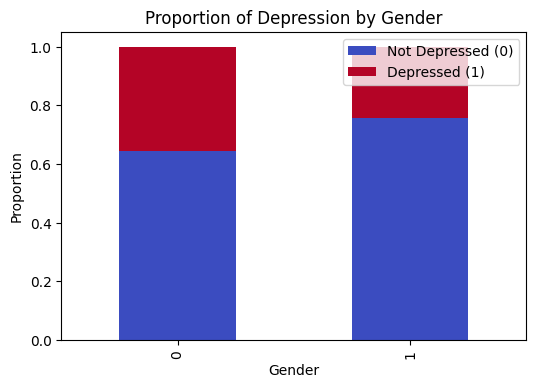

PHQ8_Binary         0         1
Gender                         
0            0.643678  0.356322
1            0.754902  0.245098


In [160]:
cross_tab = pd.crosstab(DAIC_WOZ_DATASET["Gender"], DAIC_WOZ_DATASET["PHQ8_Binary"], normalize="index")
cross_tab.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Proportion of Depression by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.show()

print(cross_tab)


### Step 7: Transcript Length Analysis.

In [161]:
DAIC_WOZ_DATASET["num_words"] = DAIC_WOZ_DATASET["transcript_text"].apply(lambda x: len(str(x).split()))
DAIC_WOZ_DATASET["num_words"].describe()


count     189.000000
mean     1471.338624
std       811.454992
min       167.000000
25%       889.000000
50%      1293.000000
75%      1854.000000
max      4611.000000
Name: num_words, dtype: float64

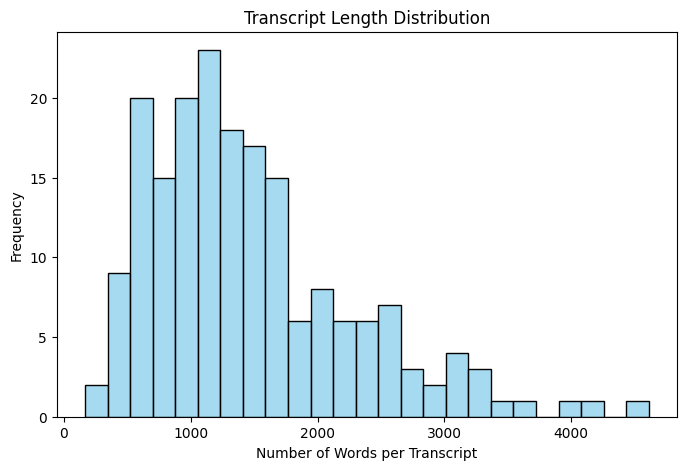

In [163]:
plt.figure(figsize=(8,5))
sns.histplot(DAIC_WOZ_DATASET["num_words"], bins=25, color="skyblue", edgecolor="black")
plt.title("Transcript Length Distribution")
plt.xlabel("Number of Words per Transcript")
plt.ylabel("Frequency")
plt.show()


### Step 8: Transcript Length By Depression Class.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\2947072645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PHQ8_Binary", y="num_words", data=DAIC_WOZ_DATASET, palette="Set2")


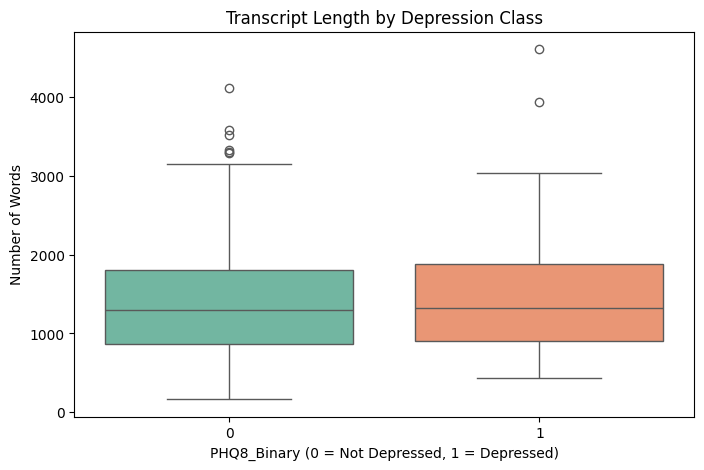

In [165]:
plt.figure(figsize=(8,5))
sns.boxplot(x="PHQ8_Binary", y="num_words", data=DAIC_WOZ_DATASET, palette="Set2")
plt.title("Transcript Length by Depression Class")
plt.xlabel("PHQ8_Binary (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Number of Words")
plt.show()


### Step 9: Top Frequent Words (Global + Class-Based)

In [167]:
from collections import Counter

# Global
all_words = " ".join(DAIC_WOZ_DATASET["transcript_text"]).split()
common_global = Counter(DAIC_WOZ_DATASET).most_common(20)

# Class-based
depressed_words = " ".join(DAIC_WOZ_DATASET[DF_ALL["PHQ8_Binary"]==1]["transcript_text"]).split()
not_depressed_words = " ".join(DAIC_WOZ_DATASET[DF_ALL["PHQ8_Binary"]==0]["transcript_text"]).split()

print("Top 20 Global Words:", common_global)
print("Top 20 Depressed Words:", Counter(depressed_words).most_common(20))
print("Top 20 Non-Depressed Words:", Counter(not_depressed_words).most_common(20))


Top 20 Global Words: [('Participant_ID', 1), ('transcript_text', 1), ('PHQ8_Binary', 1), ('PHQ8_Score', 1), ('Gender', 1), ('split', 1), ('num_words', 1)]
Top 20 Depressed Words: [('i', 5449), ('and', 2832), ('to', 2191), ('um', 2107), ('a', 1933), ('the', 1764), ('that', 1509), ('my', 1263), ('uh', 1239), ('it', 1210), ('was', 1166), ('of', 1159), ('like', 1098), ('just', 1048), ('you', 1047), ("i'm", 948), ('in', 938), ('know', 918), ('so', 898), ("it's", 772)]
Top 20 Non-Depressed Words: [('i', 12133), ('and', 6478), ('um', 5128), ('to', 5048), ('a', 4775), ('the', 4294), ('uh', 4174), ('that', 3431), ('you', 3240), ('my', 2844), ('it', 2832), ('of', 2826), ('know', 2695), ('was', 2427), ('like', 2426), ('just', 2169), ("i'm", 2089), ('in', 2058), ('so', 2057), ('but', 1705)]


### Step 10: Word Cloud Visualization.

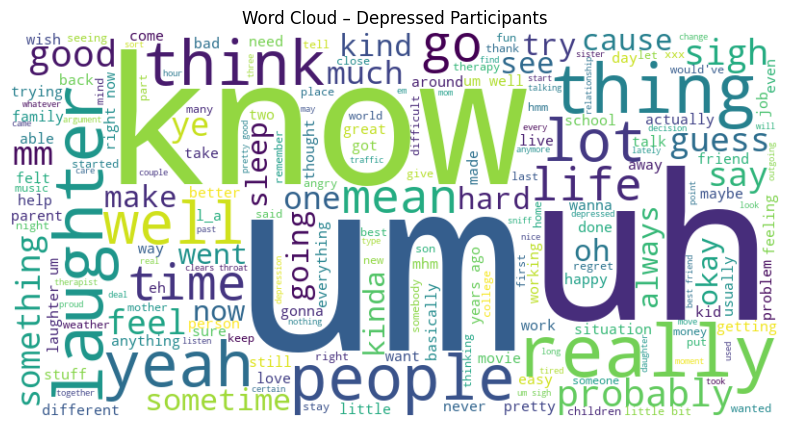

In [171]:
from wordcloud import WordCloud

# Generate WordCloud for depressed participants
text_depressed = " ".join(DAIC_WOZ_DATASET[DAIC_WOZ_DATASET["PHQ8_Binary"]==1]["transcript_text"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_depressed)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Depressed Participants")
plt.show()


### Step 11: Correlation Analysis Between PHQ8-Score and Transcript Length.

Correlation between PHQ8_Score and Transcript Length: -0.04134570579633391


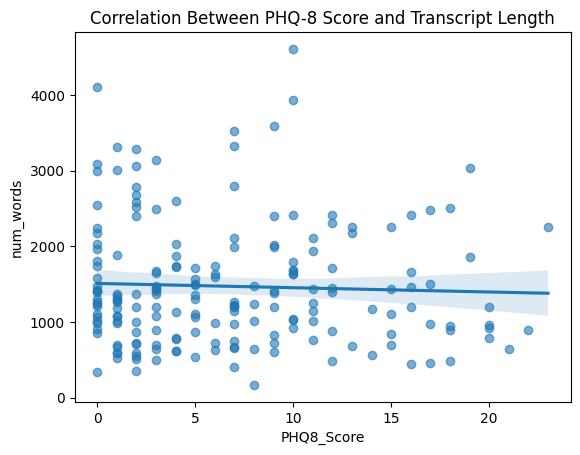

In [173]:
import numpy as np
corr = np.corrcoef(DAIC_WOZ_DATASET["PHQ8_Score"], DAIC_WOZ_DATASET["num_words"])[0,1]
print("Correlation between PHQ8_Score and Transcript Length:", corr)
sns.regplot(x="PHQ8_Score", y="num_words", data=DAIC_WOZ_DATASET, scatter_kws={'alpha':0.6})
plt.title("Correlation Between PHQ-8 Score and Transcript Length")
plt.show()


### Step 12: Split-Wise Overview (Train, Dev, Test)

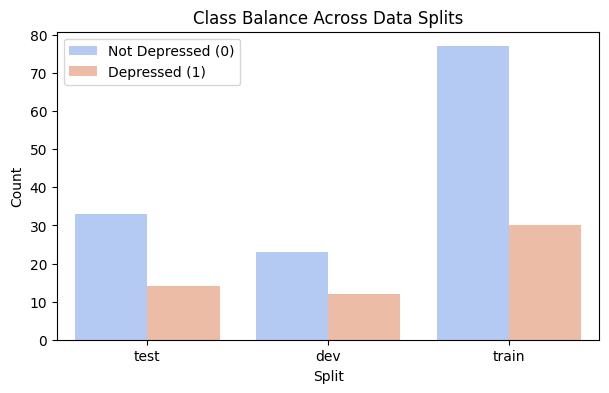

In [174]:
plt.figure(figsize=(7,4))
sns.countplot(x="split", hue="PHQ8_Binary", data=DAIC_WOZ_DATASET, palette="coolwarm")
plt.title("Class Balance Across Data Splits")
plt.xlabel("Split")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.show()


## 7. EDA ON TOP OF TRAINING DATASET.

### Step 1: Overview and Integrity

In [180]:
print("Shape:", TRAINING_DATASET.shape)
print(TRAINING_DATASET.columns.tolist())
TRAINING_DATASET.info()
TRAINING_DATASET.head(5)


Shape: (107, 6)
['Participant_ID', 'transcript_text', 'PHQ8_Binary', 'PHQ8_Score', 'Gender', 'split']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Participant_ID   107 non-null    int64 
 1   transcript_text  107 non-null    object
 2   PHQ8_Binary      107 non-null    int64 
 3   PHQ8_Score       107 non-null    int64 
 4   Gender           107 non-null    int64 
 5   split            107 non-null    object
dtypes: int64(4), object(2)
memory usage: 5.1+ KB


,Participant_ID,transcript_text,PHQ8_Binary,PHQ8_Score,Gender,split
0,303,okay how 'bout yourself here in california yea...,0,0,0,train
1,304,i'm doing good um from los angeles california ...,0,6,0,train
2,305,i'm doing alright uh originally i'm from calif...,0,7,1,train
3,310,yes it's okay <laughter> fine <laughter> i liv...,0,4,1,train
4,312,yes fine how about you here yes the weather we...,0,2,1,train


In [181]:
TRAINING_DATASET.tail(5)

,Participant_ID,transcript_text,PHQ8_Binary,PHQ8_Score,Gender,split
102,485,<synch> yes i'm not bad i'm a little tired but...,0,2,1,train
103,486,<synch> yes i'm feel great i am from saint lou...,0,4,0,train
104,487,<synch> yes i'm fine thank you detroit michiga...,0,0,0,train
105,488,<synch> yes fine oh san fernando valley uh wel...,0,0,0,train
106,491,<synch> yes huh overwhelmed i have a funeral t...,0,8,0,train


### Step 2: Missing Values.

In [182]:
TRAINING_DATASET.isnull().sum()

Participant_ID     0
transcript_text    0
PHQ8_Binary        0
PHQ8_Score         0
Gender             0
split              0
dtype: int64

### Step 3: Class Distribution (PHQ8-Binary).

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\2785545297.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PHQ8_Binary", data=TRAINING_DATASET, palette="coolwarm")


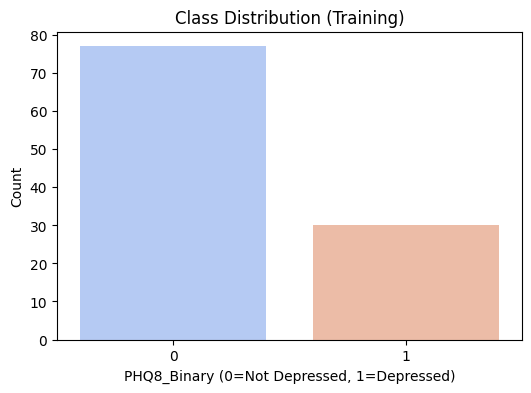

PHQ8_Binary
0    0.7196
1    0.2804
Name: proportion, dtype: float64

In [184]:
import seaborn as sns, matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="PHQ8_Binary", data=TRAINING_DATASET, palette="coolwarm")
plt.title("Class Distribution (Training)")
plt.xlabel("PHQ8_Binary (0=Not Depressed, 1=Depressed)")
plt.ylabel("Count")
plt.show()

TRAINING_DATASET["PHQ8_Binary"].value_counts(normalize=True).round(4)


### Step 4: PHQ-8 Score Distribution.

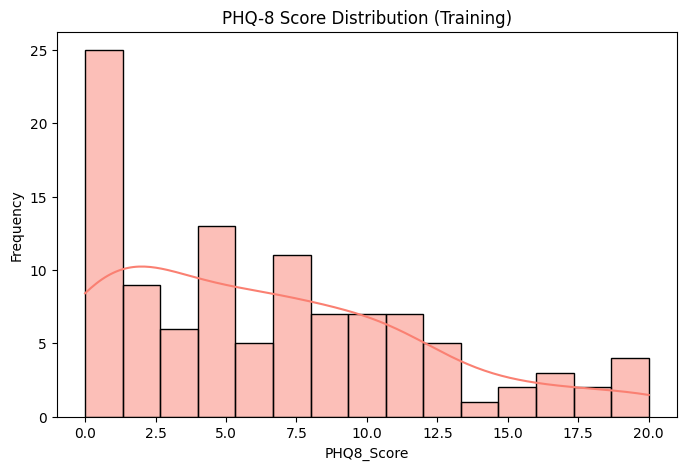

count    107.000000
mean       6.420561
std        5.463494
min        0.000000
25%        2.000000
50%        6.000000
75%       10.000000
max       20.000000
Name: PHQ8_Score, dtype: float64

In [188]:
plt.figure(figsize=(8,5))
sns.histplot(TRAINING_DATASET["PHQ8_Score"], bins=15, kde=True, color="salmon")
plt.title("PHQ-8 Score Distribution (Training)")
plt.xlabel("PHQ8_Score")
plt.ylabel("Frequency")
plt.show()

TRAINING_DATASET["PHQ8_Score"].describe()


### Step 4: Gender Distribution (Train).

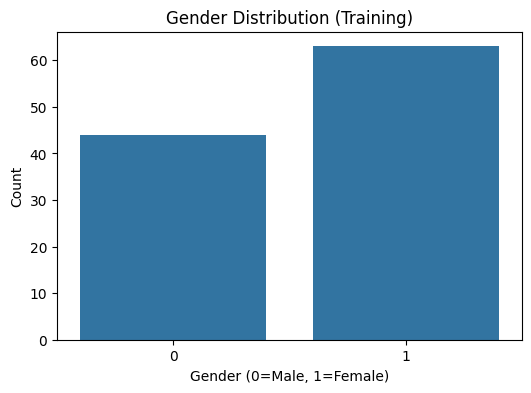

Gender
1    0.5888
0    0.4112
Name: proportion, dtype: float64

In [189]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=TRAINING_DATASET)
plt.title("Gender Distribution (Training)")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Count")
plt.show()

TRAINING_DATASET["Gender"].value_counts(normalize=True).round(4)


### Step 6: Gender Vs Depression (Train)

PHQ8_Binary       0       1
Gender                     
0            0.6136  0.3864
1            0.7937  0.2063


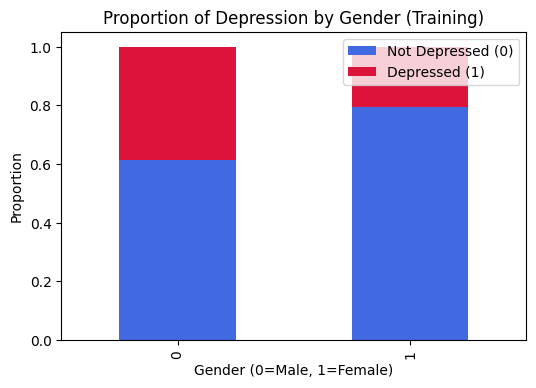

In [190]:
ct = pd.crosstab(TRAINING_DATASET["Gender"], TRAINING_DATASET["PHQ8_Binary"], normalize="index")
print(ct.round(4))

ct.plot(kind="bar", stacked=True, figsize=(6,4), color=["royalblue","crimson"])
plt.title("Proportion of Depression by Gender (Training)")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.show()


### Step 7: Transcript Length (word count).

In [191]:
TRAINING_DATASET["num_words"] = TRAINING_DATASET["transcript_text"].apply(lambda x: len(str(x).split()))
TRAINING_DATASET["num_words"].describe()


count     107.000000
mean     1382.822430
std       780.144844
min       167.000000
25%       783.000000
50%      1198.000000
75%      1738.500000
max      4112.000000
Name: num_words, dtype: float64

### Step 8: Transcript Length Distribution.

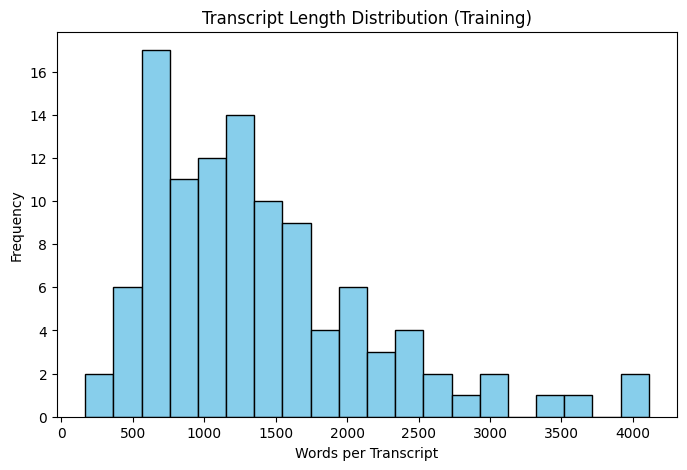

In [192]:
plt.figure(figsize=(8,5))
plt.hist(TRAINING_DATASET["num_words"], bins=20, color="skyblue", edgecolor="black")
plt.title("Transcript Length Distribution (Training)")
plt.xlabel("Words per Transcript")
plt.ylabel("Frequency")
plt.show()


### Step 9: Transcript Length BY Class.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\3904414502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PHQ8_Binary", y="num_words", data=TRAINING_DATASET, palette="Set2")


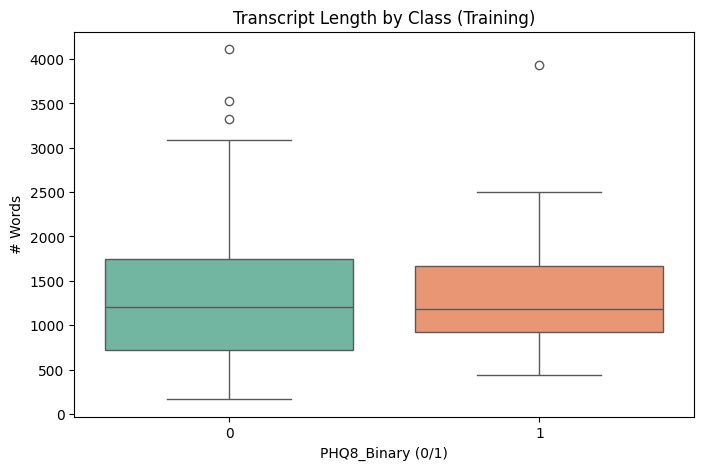

In [193]:
plt.figure(figsize=(8,5))
sns.boxplot(x="PHQ8_Binary", y="num_words", data=TRAINING_DATASET, palette="Set2")
plt.title("Transcript Length by Class (Training)")
plt.xlabel("PHQ8_Binary (0/1)")
plt.ylabel("# Words")
plt.show()


### Step 10: Common words (Global + By Class)

In [195]:
from collections import Counter

all_words = " ".join(TRAINING_DATASET["transcript_text"]).split()
common_global = Counter(all_words).most_common(20)

dep_words  = " ".join(TRAINING_DATASET[TRAINING_DATASET["PHQ8_Binary"]==1]["transcript_text"]).split()
non_words  = " ".join(TRAINING_DATASET[TRAINING_DATASET["PHQ8_Binary"]==0]["transcript_text"]).split()

top_dep = Counter(dep_words).most_common(20)
top_non = Counter(non_words).most_common(20)

common_global[:10], top_dep[:10], top_non[:10]


([('i', 9304),
  ('and', 4781),
  ('to', 3819),
  ('a', 3568),
  ('um', 3534),
  ('the', 3275),
  ('uh', 2914),
  ('that', 2562),
  ('you', 2464),
  ('my', 2261)],
 [('i', 2532),
  ('and', 1333),
  ('to', 1087),
  ('um', 1086),
  ('a', 989),
  ('the', 914),
  ('that', 706),
  ('uh', 694),
  ('my', 600),
  ('like', 592)],
 [('i', 6772),
  ('and', 3448),
  ('to', 2732),
  ('a', 2579),
  ('um', 2448),
  ('the', 2361),
  ('uh', 2220),
  ('you', 2014),
  ('that', 1856),
  ('know', 1746)])

### Step 11: Word Cloud for Train.

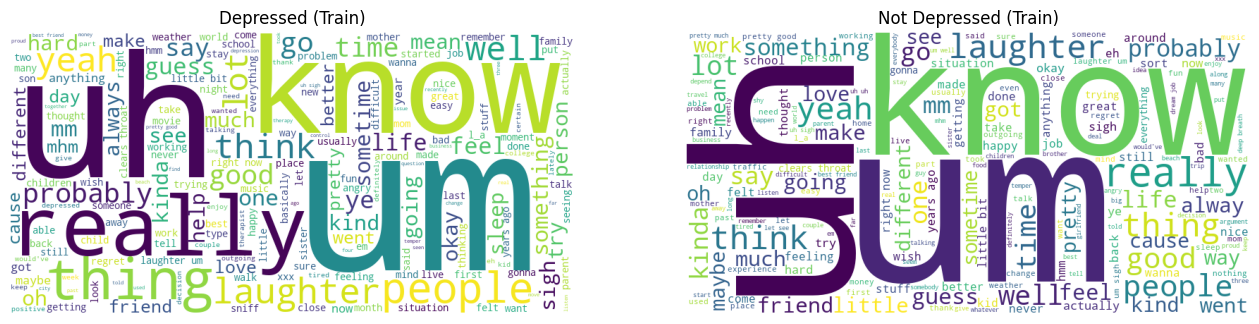

In [197]:
# pip install wordcloud (once)
from wordcloud import WordCloud

text_dep  = " ".join(TRAINING_DATASET[TRAINING_DATASET["PHQ8_Binary"]==1]["transcript_text"])
text_non  = " ".join(TRAINING_DATASET[TRAINING_DATASET["PHQ8_Binary"]==0]["transcript_text"])

wc_dep = WordCloud(width=800, height=400, background_color='white').generate(text_dep)
wc_non = WordCloud(width=800, height=400, background_color='white').generate(text_non)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1); plt.imshow(wc_dep); plt.axis('off'); plt.title("Depressed (Train)")
plt.subplot(1,2,2); plt.imshow(wc_non); plt.axis('off'); plt.title("Not Depressed (Train)")
plt.show()


### Step 12: PHQ-8 vs Transcript Length.

Corr(PHQ8_Score, #words) = -0.13


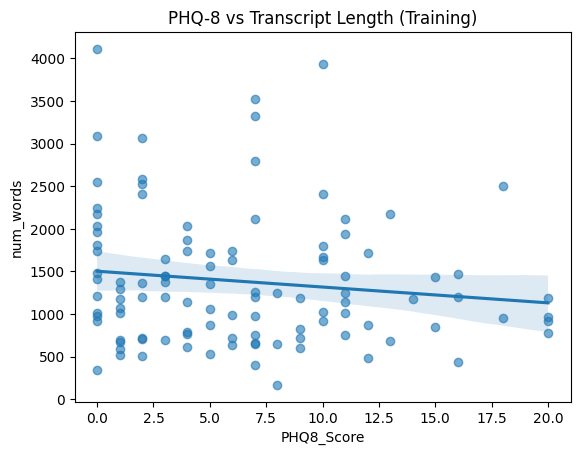

In [198]:
import numpy as np
corr = TRAINING_DATASET["PHQ8_Score"].corr(TRAINING_DATASET["num_words"])
print("Corr(PHQ8_Score, #words) =", round(corr, 3))

sns.regplot(x="PHQ8_Score", y="num_words", data=TRAINING_DATASET, scatter_kws={'alpha':0.6})
plt.title("PHQ-8 vs Transcript Length (Training)")
plt.show()


### Step 13: Sentiment EDA with TextBlob

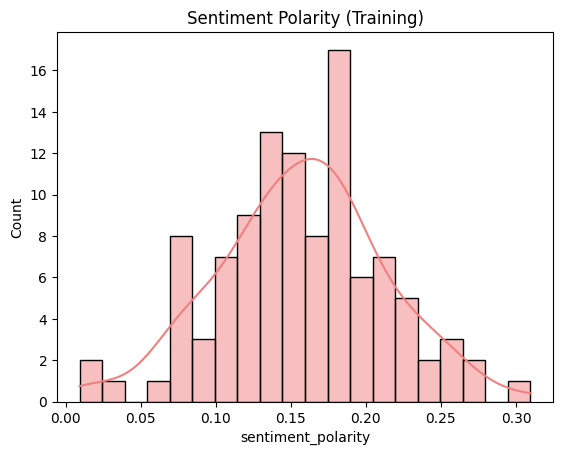

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\1358978168.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PHQ8_Binary", y="sentiment_polarity", data=TRAINING_DATASET, palette="coolwarm")


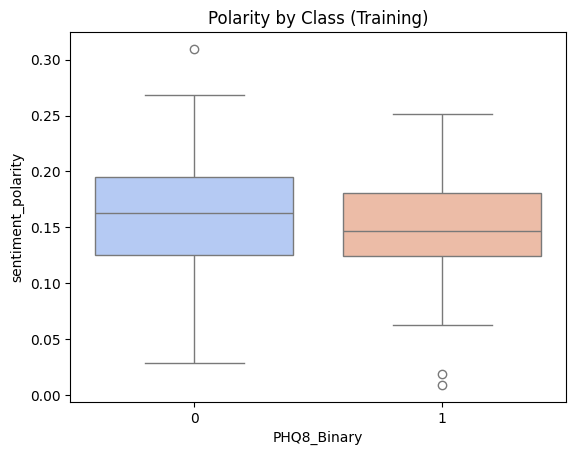

In [201]:
from textblob import TextBlob

TRAINING_DATASET["sentiment_polarity"]     = TRAINING_DATASET["transcript_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
TRAINING_DATASET["sentiment_subjectivity"] = TRAINING_DATASET["transcript_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Distributions
sns.histplot(TRAINING_DATASET["sentiment_polarity"], bins=20, kde=True, color='lightcoral')
plt.title("Sentiment Polarity (Training)"); plt.show()

# By class
sns.boxplot(x="PHQ8_Binary", y="sentiment_polarity", data=TRAINING_DATASET, palette="coolwarm")
plt.title("Polarity by Class (Training)"); plt.show()


### 1. Sentiment Polarity
➤ What It Is:

sentiment_polarity measures emotional tone — whether a person’s language is positive, neutral, or negative.

Ranges from –1.0 to +1.0

–1.0 → very negative tone (“I feel terrible”, “It’s hopeless”)

0.0 → neutral tone (“I went to school”, “I talked to my friend”)

+1.0 → very positive tone (“I’m excited”, “That was great”)

➤ In Your DAIC-WOZ Context:

You’re analyzing participants’ spoken responses during a depression-screening interview.
So:

Depressed participants (PHQ8_Binary = 1) often use more neutral to negative language (lower polarity).

Non-depressed participants (PHQ8_Binary = 0) typically use more positive or lively language (higher polarity).

🔍 Example:
Transcript snippet	Polarity	Interpretation

- “I feel sad and tired most of the time.”	-0.7	Strong negative emotional tone
- “I guess I’m okay.”	0.0	Neutral tone
- “Everything is going great lately!”	+0.8	Positive emotional tone

So when you compute polarity for each transcript, you’re quantifying how emotionally positive or negative their overall language is.

### 2. Sentiment Subjectivity
➤ What It Is:

sentiment_subjectivity measures how opinionated or emotional the text is, rather than factual.

Ranges from 0.0 → 1.0

0.0 → fully objective (“The appointment is at 3 PM.”)

1.0 → fully subjective (“I feel really awful today.”)

➤ In Your DAIC-WOZ Context:

This captures how much the participant talks about personal feelings vs factual content.

- Depressed participants often use subjective, inward-focused statements (“I feel”, “I think”, “I’m worried”).

- Non-depressed participants may use more objective or external content (“I study computer science”, “I live in California”).

Polarity → “How positive or negative?”

Subjectivity → “How emotional or factual?”



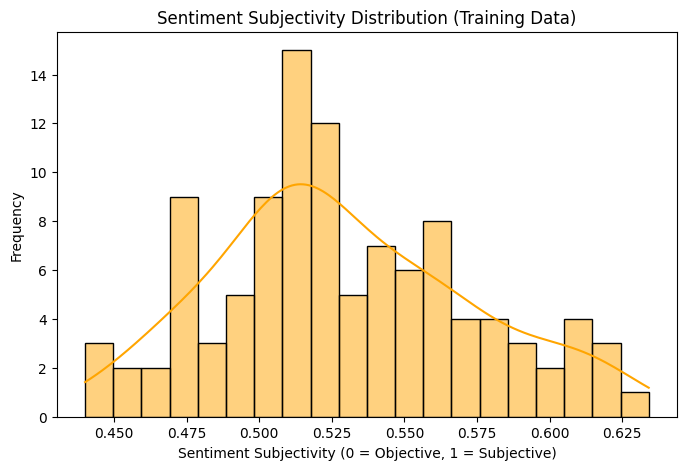

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overall distribution of subjectivity
plt.figure(figsize=(8,5))
sns.histplot(TRAINING_DATASET["sentiment_subjectivity"], bins=20, kde=True, color="orange", edgecolor="black")
plt.title("Sentiment Subjectivity Distribution (Training Data)")
plt.xlabel("Sentiment Subjectivity (0 = Objective, 1 = Subjective)")
plt.ylabel("Frequency")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\945131871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PHQ8_Binary", y="sentiment_subjectivity", data=TRAINING_DATASET, palette="Set2")


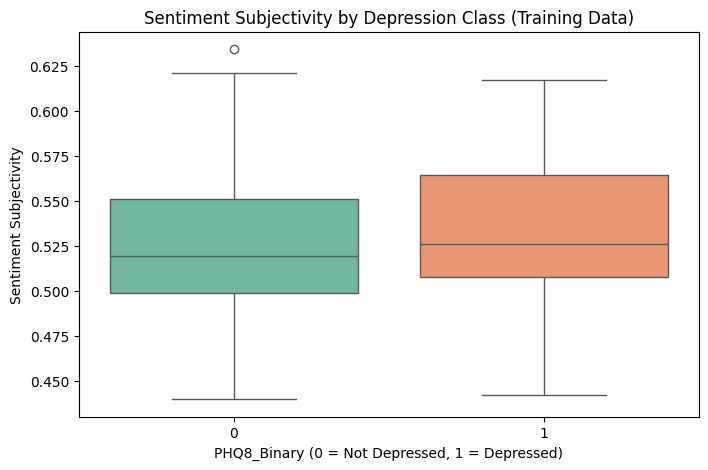

In [204]:
# Compare subjectivity between depressed vs non-depressed participants
plt.figure(figsize=(8,5))
sns.boxplot(x="PHQ8_Binary", y="sentiment_subjectivity", data=TRAINING_DATASET, palette="Set2")
plt.title("Sentiment Subjectivity by Depression Class (Training Data)")
plt.xlabel("PHQ8_Binary (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Sentiment Subjectivity")
plt.show()


In [205]:
# Compute group-level statistics
subjectivity_stats = TRAINING_DATASET.groupby("PHQ8_Binary")["sentiment_subjectivity"].describe()
print(subjectivity_stats)

             count      mean       std       min       25%       50%  \
PHQ8_Binary                                                            
0             77.0  0.526899  0.044272  0.440026  0.498855  0.519370   
1             30.0  0.534193  0.044341  0.442311  0.507769  0.526019   

                  75%       max  
PHQ8_Binary                      
0            0.551136  0.634143  
1            0.564230  0.617122  


In [206]:
# difference in mean subjectivity between classes
mean_diff = (
    TRAINING_DATASET.groupby("PHQ8_Binary")["sentiment_subjectivity"]
    .mean()
    .diff()
    .iloc[-1]
)
print(f"\nMean difference (Depressed − Not Depressed): {mean_diff:.4f}")


Mean difference (Depressed − Not Depressed): 0.0073


## 8. TEXT CLEANING.

In [212]:


import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk

# Download NLTK resources directly to your default user directory
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [213]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [214]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [215]:

nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [219]:
import nltk, re, string, contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [220]:
print(nltk.data.path)


['C:\\Users\\DELL/nltk_data', 'c:\\Users\\DELL\\anaconda3\\envs\\tf_env\\nltk_data', 'c:\\Users\\DELL\\anaconda3\\envs\\tf_env\\share\\nltk_data', 'c:\\Users\\DELL\\anaconda3\\envs\\tf_env\\lib\\nltk_data', 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [223]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\DELL\anaconda3\envs\tf_env\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [224]:
import os
nltk.data.path.append(r"C:\Users\DELL\anaconda3\envs\tf_env\nltk_data")


In [225]:
from nltk.tokenize import word_tokenize

text = "Um yeah I'm doing okay, uh, just feeling a bit tired lately."
tokens = word_tokenize(text)
print(tokens)


['Um', 'yeah', 'I', "'m", 'doing', 'okay', ',', 'uh', ',', 'just', 'feeling', 'a', 'bit', 'tired', 'lately', '.']


### Building the Cleaning Function.

In [226]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = contractions.fix(text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    fillers = ['um', 'uh', 'mmm', 'hmm', 'like', 'you know', 'uhm', 'erm']
    for filler in fillers:
        text = re.sub(rf'\b{filler}\b', '', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)           # collapse elongated letters
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens).strip()



In [227]:
sample = "Um yeahhh I'm doing okay, uh, just feeeeling soooo tired lately..."
print(clean_text(sample))


yeah okay feling tired lately


In [228]:
TRAINING_DATASET.columns.tolist()

['Participant_ID',
 'transcript_text',
 'PHQ8_Binary',
 'PHQ8_Score',
 'Gender',
 'split',
 'num_words',
 'sentiment_polarity',
 'sentiment_subjectivity']

### Apply Cleaning to your Dataset.

In [229]:
# Apply to the training dataset
TRAINING_DATASET["clean_text"] = TRAINING_DATASET["transcript_text"].apply(clean_text)


### Check Cleaning Quality.

In [230]:
# Compare average word counts before and after cleaning
TRAINING_DATASET["original_length"] = TRAINING_DATASET["transcript_text"].apply(lambda x: len(x.split()))
TRAINING_DATASET["clean_length"] = TRAINING_DATASET["clean_text"].apply(lambda x: len(x.split()))

print(TRAINING_DATASET[["original_length", "clean_length"]].describe())


       original_length  clean_length
count       107.000000    107.000000
mean       1382.822430    527.785047
std         780.144844    273.000588
min         167.000000     76.000000
25%         783.000000    331.000000
50%        1198.000000    464.000000
75%        1738.500000    657.500000
max        4112.000000   1636.000000


In [231]:
TRAINING_DATASET.to_csv(r"C:\Users\DELL\Desktop\CONVERSATIONAL HEALTH ANALYTICS\Conversational-Health-Analytics-\data\cleaned_training_dataset.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.


### Compare Word Counts Before vs After Cleaning.

In [232]:
# Count words in original and cleaned text
TRAINING_DATASET["original_word_count"] = TRAINING_DATASET["transcript_text"].apply(lambda x: len(str(x).split()))
TRAINING_DATASET["cleaned_word_count"]  = TRAINING_DATASET["clean_text"].apply(lambda x: len(str(x).split()))

# Calculate reduction ratio
TRAINING_DATASET["word_reduction_%"] = 100 * (TRAINING_DATASET["original_word_count"] - TRAINING_DATASET["cleaned_word_count"]) / TRAINING_DATASET["original_word_count"]

print(TRAINING_DATASET[["original_word_count", "cleaned_word_count", "word_reduction_%"]].describe())


       original_word_count  cleaned_word_count  word_reduction_%
count           107.000000          107.000000        107.000000
mean           1382.822430          527.785047         60.830029
std             780.144844          273.000588          3.230885
min             167.000000           76.000000         51.301685
25%             783.000000          331.000000         58.908120
50%            1198.000000          464.000000         60.654596
75%            1738.500000          657.500000         62.805085
max            4112.000000         1636.000000         68.473326


### Visualize Word Count Distribution Before and After Cleaning.

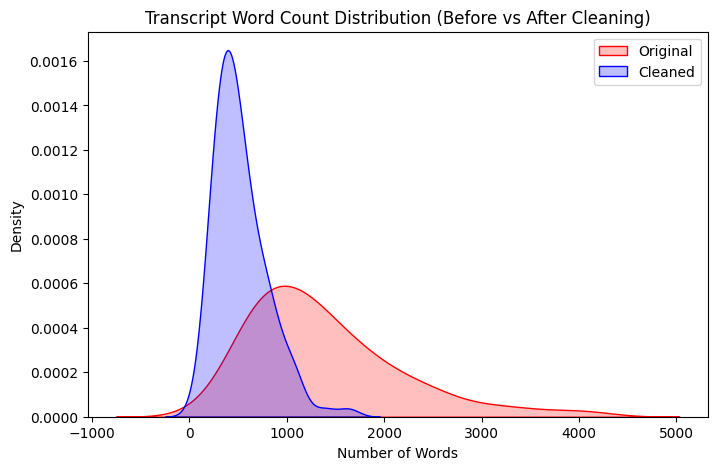

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(TRAINING_DATASET["original_word_count"], label="Original", color="red", fill=True)
sns.kdeplot(TRAINING_DATASET["cleaned_word_count"], label="Cleaned", color="blue", fill=True)
plt.title("Transcript Word Count Distribution (Before vs After Cleaning)")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.legend()
plt.show()


### Most Frequent Words Before and After Cleaning.

In [234]:
from collections import Counter

# Tokenize for frequency count
def get_most_common_words(text_series, n=20):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)

print("Top 20 Words BEFORE Cleaning:\n", get_most_common_words(TRAINING_DATASET["transcript_text"]))
print("\nTop 20 Words AFTER Cleaning:\n", get_most_common_words(TRAINING_DATASET["clean_text"]))


Top 20 Words BEFORE Cleaning:
 [('i', 9304), ('and', 4781), ('to', 3819), ('a', 3568), ('um', 3534), ('the', 3275), ('uh', 2914), ('that', 2562), ('you', 2464), ('my', 2261), ('it', 2108), ('know', 2105), ('of', 2055), ('like', 2030), ('was', 1897), ('just', 1729), ("i'm", 1677), ('in', 1559), ('so', 1559), ("it's", 1248)]

Top 20 Words AFTER Cleaning:
 [('really', 956), ('would', 767), ('yeah', 738), ('thing', 736), ('good', 656), ('think', 656), ('people', 634), ('time', 588), ('well', 576), ('get', 539), ('kind', 519), ('know', 496), ('lot', 486), ('pretty', 439), ('year', 400), ('going', 380), ('one', 370), ('probably', 356), ('say', 346), ('life', 340)]


### Visualize common words after Cleaning.

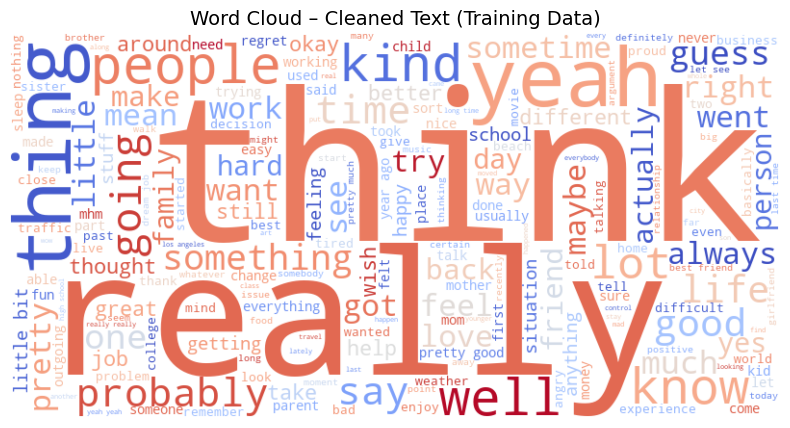

In [235]:
from wordcloud import WordCloud

text_all = " ".join(TRAINING_DATASET["clean_text"])

plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text_all)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud – Cleaned Text (Training Data)", fontsize=14)
plt.show()


### Plot the Relationship Between Word Count and Depression Label.

C:\Users\DELL\AppData\Local\Temp\ipykernel_16472\1745571343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PHQ8_Binary", y="cleaned_word_count", data=TRAINING_DATASET, palette="Set2")


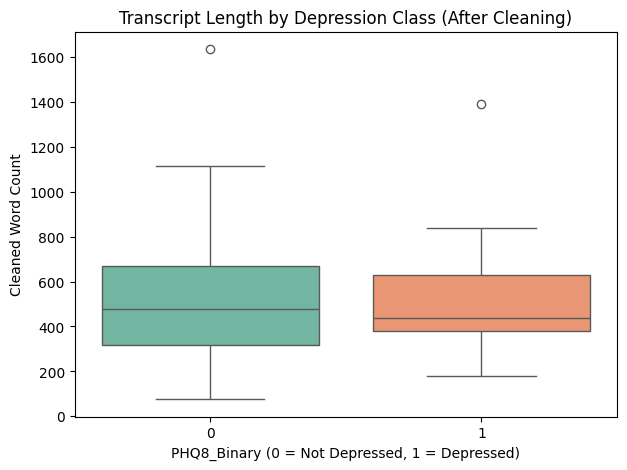

In [236]:
plt.figure(figsize=(7,5))
sns.boxplot(x="PHQ8_Binary", y="cleaned_word_count", data=TRAINING_DATASET, palette="Set2")
plt.title("Transcript Length by Depression Class (After Cleaning)")
plt.xlabel("PHQ8_Binary (0 = Not Depressed, 1 = Depressed)")
plt.ylabel("Cleaned Word Count")
plt.show()
